<a href="https://colab.research.google.com/github/lucas-tebet/sigmoidal_data_science/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama do COVID-19 no mundo

Como já é de conhecimento de todos, o vírus que causou a pandemia teve origem na China e em poucos meses chegou exponencialmente a todos os continentes. Um dos motivos para esse contágio ter chegado a esse ponto foi o fato de que o vírus tem uma alta taxa de contaminação. Outro motivo que também afeta no número de pessoas infectadas é que o país de origem é o mais populoso do planeta, conta com a segunda maior economia e por conta disso tem uma enorme influência em todas as regiões do mundo. 

O que vamos discutir agora é sobre o que os números disponibilizados pelos órgãos de saúde de todos os países podem trazer de informações para que possamos tirar nossas próprias conclusões. A ideia aqui é justamente trabalhar em cima dos dados, ilustrá-los e disponibilizá-los a todos que queiram ter seu próprio ponto de vista. Eu vou tirar as minhas conclusões. Fique à vontade para concordar ou discordar de algum ponto.

<center><img alt="COVID-19" width="60%" src="https://ichef.bbci.co.uk/news/410/cpsprodpb/64F9/production/_111994852_gettyimages-1210284242-1.jpg"></center>

#Obtenção dos dados

Os dados utilizados para os números globais serão obtidos do [Our World in Data](https://ourworldindata.org/coronavirus). o OWID é um site que armazena inúmeras bases de dados para tratar de temas relacionados a saúde, alimentação, agricultura, educação, energia, tecnologia entre outros inúmeros assuntos a nível global. 

A fonte dos dados armazenados pela OWID é confiáveis e vem, por exemplo, de relatórios dos governos de cada país, [World Bank](https://www.worldbank.org/), [United Nations](https://data.un.org/), entre outos.

Como sabemos que essa doença é relativamente nova, alguns dados podem apresentar divergência. Porém nossa premissa para este projeto é de que todos os dados estão corretos e iremos tratar os *outliers* (dados que estão extremamente fora do contexto) em cada caso. 

**Para que você tenha acesso aos dados em `CSV` dos dados utilizados, clique no [link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv).** (Última atualização: 23-Jul-2020)

##Dicionário de variáveis
Para termos um conhecimento mínimo de cada variável presente no nosso *dataset*, abaixo está uma breve descrição para as variáveis. 

* **iso_code**: código ISO de 3 letras dos países
* **continent**: continente do país
* **location**: nome do país
* **date**: data da obtenção do dado
* **total_cases**: número total de casos de COVID-19 confirmados 
* **new_cases**: número de novos casos de COVID-19 confirmados
* **total_deaths**: número total de mortes por COVID-19
* **new_deaths**: número de novas mortes por COVID-19 confirmados
* **total_cases_per_million**: número total de casos de COVID-19 por cada 1 milhão de habitantes
* **new_cases_per_million**: número de novos casos de COVID-19 por cada 1 milhão de habitantes
* **total_deaths_per_million**: número de total de mortes por COVID-19 por cada 1 milhão de habitantes
* **new_deaths_per_million**: número de novas mortes por COVID-19 por cada 1 milhão de habitantes
* **total_tests**: número total de teste realizados
* **new_tests**: número de novos testes realizados
* **new_tests_smoothed**: para os países que não reportam os dados diariamente dos testes realizados, são assumidos um número médio de novos testes dos últimos 7 dias
* **total_tests_per_thousand**: número total de testes realizados por cada mil habitantes
* **new_tests_per_thousand**: número de novos testes realizados por cada mil habitantes
* **new_tests_smoothed_per_thousand**: número médio de novos testes dos últimos 7 dias por cada mil habitantes
* **tests_units**: unidades para report os dados de testes
* **stringency_index**: índice para mensurar o nível de restrições, como fechamento de escolas, empresas, proibição de viagens em escala de 0 a 100 (100 = maior restrição)
* **population**: população do país em 2020
* **population_density**: densidade populacional, relação entre número de habitantes e área do país
* **median_age**: idade média
* **aged_65_older**: proporção da população com idade superior a 65 anos
* **aged_70_older**: proporção da população com idade superior a 70 anos
* **gdp_per_capita**: PIB per capita
* **extreme_poverty**: proporção da população que vive em extrema probreza
* **cvd_death_rate**: taxa de óbito por doenças cardiovasculares
* **diabetes_prevalence**: proporção da população com diabetes
* **female_smokers**: proporção de mulheres fumantes
* **male_smokers**: proporção de homens fumantes
* **handwashing_facilities**: proporção da população com acesso para lavar as mãos
* **hospital_beds_per_thousand**: leitos de hospital para cada mil habitantes
* **life_expectancy**: expectativa de vida

##Importando os dados do COVID-19
Antes de iniciarmos a análise dos dados deste projeto, devemos baixar o *dataset*. Também, iremos importar as bibliotecas do Python que serão utilizadas no projeto. 

In [1]:
#importar as bibliotecas
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date, timedelta
 
#baixar o dataset para um dataframe
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Análise exploratória dos dados
Agora, iremos começar a trabalhar com os dados disponíveis. 

Somente para termos uma primeira impressão com os números, iremos extrair algumas informações superficiais do nosso *dataset* para que posteriormente possamos nos aprofundar em outras análises. 

In [2]:
#visualição das 5 primeiras entradas do nosso dataframe

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


###Outliers

Durante a análise, houve a interferência de um outlier, referente ao número de novos casos no Reino Unido. O valor era de *-29.726* casos no dia 03 de Julho. Para isso, substituirei esse valor pela média dos valores próximos da data. Dessa forma, não há poluição dos dados. 

Já na Rússia, o dia 20 de Julho não houve nenhum caso e dois dias antes, houve aproximadamente o dobro do número de casos referente a época. Nesse caso, farei uma média simples entre as duas datas. 

Na Espanha, o número de mortes teve uma grande variação no final de Maio e na segunda quinzena de Junho. Da mesma maneira, os números foram alterados pela média dos dias no mesmo período.

In [3]:
#número de casos no Reino Unido
df[df.location=="United Kingdom"].new_cases.groupby(df.date).sum()[180:191]

date
2020-06-28      890.0
2020-06-29      901.0
2020-06-30      814.0
2020-07-01      689.0
2020-07-02      829.0
2020-07-03   -29726.0
2020-07-04      519.0
2020-07-05      624.0
2020-07-06      516.0
2020-07-07      352.0
2020-07-08      581.0
Name: new_cases, dtype: float64

In [4]:
#substituição do outlier pela média dos 10 dias
df.replace(-29726,(df[df.location=="United Kingdom"].new_cases.groupby(df.date).sum()[180:191].sum() + 29726)/10, inplace=True )

In [5]:
#df atualizado
df[df.location=="United Kingdom"].new_cases.groupby(df.date).sum()[180:191]

date
2020-06-28    890.0
2020-06-29    901.0
2020-06-30    814.0
2020-07-01    689.0
2020-07-02    829.0
2020-07-03    671.5
2020-07-04    519.0
2020-07-05    624.0
2020-07-06    516.0
2020-07-07    352.0
2020-07-08    581.0
Name: new_cases, dtype: float64

In [6]:
#novos casos na Rússia
df[df.location=="Russia"].new_cases.groupby(df.date).sum().tail(10)

date
2020-07-14     6537.0
2020-07-15     6248.0
2020-07-16     6422.0
2020-07-17     6428.0
2020-07-18    12640.0
2020-07-19     6109.0
2020-07-20        0.0
2020-07-21     5940.0
2020-07-22     5842.0
2020-07-23     5862.0
Name: new_cases, dtype: float64

In [7]:
#substituição do outlier do dia 18 de julho
df.at[df[(df.date=="2020-07-18") & (df.location=="Russia")].index, "new_cases"] = df[(df.date=="2020-07-18") & (df.location=="Russia")].new_cases/2

In [8]:
#substituição do outlier do dia 20 de julho
df.at[df[(df.date=="2020-07-20") & (df.location=="Russia")].index, "new_cases"] = df[(df.date=="2020-07-18") & (df.location=="Russia")].new_cases.sum()

In [9]:
#df atualizado
df[df.location=="Russia"].groupby(df.date).new_cases.sum().tail(10)

date
2020-07-14    6537.0
2020-07-15    6248.0
2020-07-16    6422.0
2020-07-17    6428.0
2020-07-18    6320.0
2020-07-19    6109.0
2020-07-20    6320.0
2020-07-21    5940.0
2020-07-22    5842.0
2020-07-23    5862.0
Name: new_cases, dtype: float64

In [10]:
#Espanha
df[df.location=="Spain"].new_deaths.groupby(df.date).sum()[140:180]

date
2020-05-19      69.0
2020-05-20     110.0
2020-05-21      52.0
2020-05-22     688.0
2020-05-23      50.0
2020-05-24      74.0
2020-05-25   -1918.0
2020-05-26     283.0
2020-05-27       1.0
2020-05-28       1.0
2020-05-29       2.0
2020-05-30       4.0
2020-05-31       2.0
2020-06-01       0.0
2020-06-02       0.0
2020-06-03       1.0
2020-06-04       5.0
2020-06-05       1.0
2020-06-06       1.0
2020-06-07       1.0
2020-06-08       0.0
2020-06-09       0.0
2020-06-10       0.0
2020-06-11       0.0
2020-06-12       0.0
2020-06-13       0.0
2020-06-14       0.0
2020-06-15       0.0
2020-06-16       0.0
2020-06-17       0.0
2020-06-18       0.0
2020-06-19    1179.0
2020-06-20       7.0
2020-06-21       1.0
2020-06-22       1.0
2020-06-23       1.0
2020-06-24       2.0
2020-06-25       3.0
2020-06-26       8.0
2020-06-27       3.0
Name: new_deaths, dtype: float64

In [11]:
df.at[df[(df.location=="Spain") & (df.date=="2020-05-25")].index, "new_deaths"] = 100

In [12]:
df.at[df[(df.location=="Spain") & (df.date=="2020-06-19")].index, "new_deaths"] = 5

In [13]:
#df atualizado
df[df.location=="Spain"].new_deaths.groupby(df.date).sum()[140:180]

date
2020-05-19     69.0
2020-05-20    110.0
2020-05-21     52.0
2020-05-22    688.0
2020-05-23     50.0
2020-05-24     74.0
2020-05-25    100.0
2020-05-26    283.0
2020-05-27      1.0
2020-05-28      1.0
2020-05-29      2.0
2020-05-30      4.0
2020-05-31      2.0
2020-06-01      0.0
2020-06-02      0.0
2020-06-03      1.0
2020-06-04      5.0
2020-06-05      1.0
2020-06-06      1.0
2020-06-07      1.0
2020-06-08      0.0
2020-06-09      0.0
2020-06-10      0.0
2020-06-11      0.0
2020-06-12      0.0
2020-06-13      0.0
2020-06-14      0.0
2020-06-15      0.0
2020-06-16      0.0
2020-06-17      0.0
2020-06-18      0.0
2020-06-19      5.0
2020-06-20      7.0
2020-06-21      1.0
2020-06-22      1.0
2020-06-23      1.0
2020-06-24      2.0
2020-06-25      3.0
2020-06-26      8.0
2020-06-27      3.0
Name: new_deaths, dtype: float64

###Tamanho do *Dataframe*
A partir da informação abaixo, podemos ter uma ideia da quantidade de dados que temos em nossas mãos. 
Com ela, sabemos que temos uma base de dados com 34 colunas (variáveis) e 32.125 linhas (entradas).

In [14]:
df.shape

(32125, 34)

###Informações gerais do *Dataframe*
Abaixo, estão informações do tipo de cada variável: número (float) ou texto (object). Podemos perceber também que a variável `date` veio como texto e que posteriormente teremos que alterá-la para o formato de data.

In [15]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Para sabermos a proporção dos valores não nulos para cada variável, podemos usar as seguinte código.

Podemos logo reparar que o número de testes, e consequente esse número por cada mil habitantes, são as variáveis que mais possuem números ausentes, com 71% de taxa.

In [16]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

new_tests                          0.697588
new_tests_per_thousand             0.697588
total_tests_per_thousand           0.689121
total_tests                        0.689121
new_tests_smoothed_per_thousand    0.661292
new_tests_smoothed                 0.661292
tests_units                        0.637479
handwashing_facilities             0.588732
extreme_poverty                    0.405198
male_smokers                       0.292389
female_smokers                     0.283860
stringency_index                   0.191938
hospital_beds_per_thousand         0.180140
aged_65_older                      0.112591
gdp_per_capita                     0.110412
aged_70_older                      0.104218
median_age                         0.099580
cardiovasc_death_rate              0.099082
diabetes_prevalence                0.068825
population_density                 0.044856
life_expectancy                    0.013946
new_deaths_per_million             0.012047
total_deaths_per_million        

In [17]:
#transformar a varíavel date em formato de data

df.date = pd.to_datetime(df.date)

#Números no mundo

Para termos uma ideia de como andam os números no mundo, iremos ilustrar por meio de gráficos todos os casos e mortes de uma maneira geral e posteriormente fazer a quebra pelos top 5 países que têm hoje o maior crescimento em números absolutos. 

In [18]:
df_new_cases_world=pd.DataFrame(df.new_cases.groupby(df.date).sum())
df_new_deaths_world=pd.DataFrame(df.new_deaths.groupby(df.date).sum())

In [19]:
df_new_cases_world.insert(1, "ma_new_cases", 0)
df_new_deaths_world.insert(1, "ma_new_deaths", 0)

In [20]:
for i in range(0, df_new_cases_world.shape[0]-6):
  df_new_cases_world.iloc[i+6, 1] = ((df_new_cases_world.iloc[i,0]+df_new_cases_world.iloc[i+1,0]+df_new_cases_world.iloc[i+2,0]+df_new_cases_world.iloc[i+3,0]+df_new_cases_world.iloc[i+4,0]+df_new_cases_world.iloc[i+5,0]+df_new_cases_world.iloc[i+6,0])/7).round(2)

In [21]:
for i in range(0, df_new_deaths_world.shape[0]-6):
  df_new_deaths_world.iloc[i+6, 1] = ((df_new_deaths_world.iloc[i,0]+df_new_deaths_world.iloc[i+1,0]+df_new_deaths_world.iloc[i+2,0]+df_new_deaths_world.iloc[i+3,0]+df_new_deaths_world.iloc[i+4,0]+df_new_deaths_world.iloc[i+5,0]+df_new_deaths_world.iloc[i+6,0])/7).round(2)

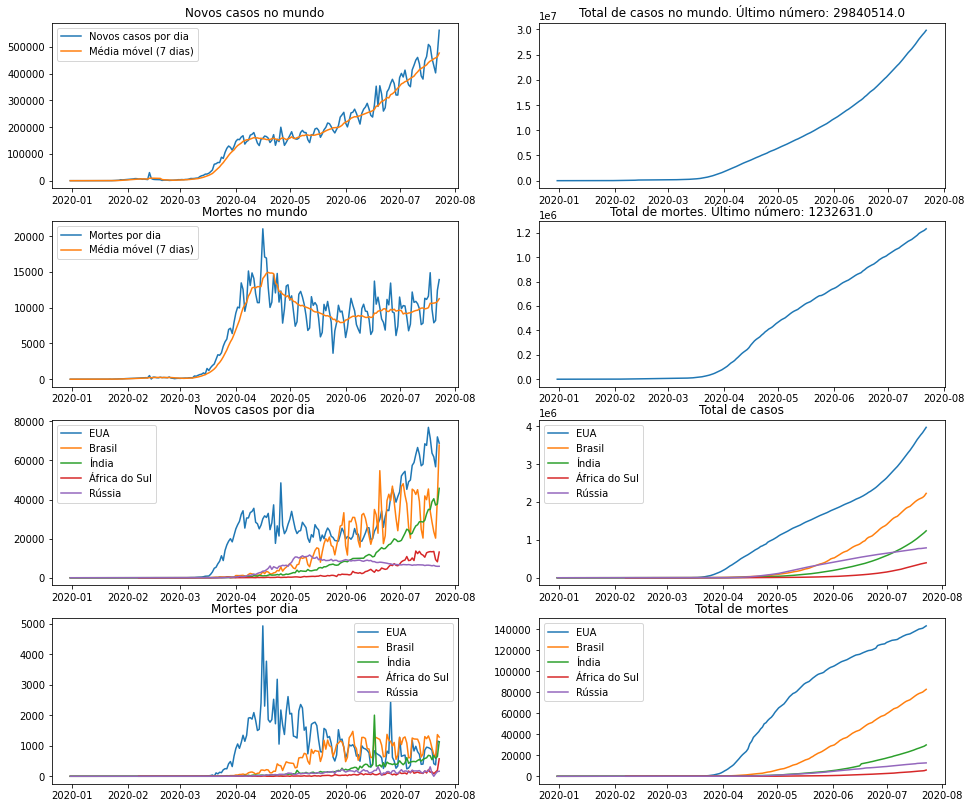

In [22]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (16,14))

ax[0,0].plot(df_new_cases_world.new_cases)
ax[0,0].plot(df_new_cases_world.ma_new_cases)
ax[0,0].set_title("Novos casos no mundo")
ax[0,0].legend(["Novos casos por dia", "Média móvel (7 dias)"])

ax[0,1].plot(df.total_cases.groupby(df.date).sum()[0:df.total_cases.groupby(df.date).sum().shape[0]-1])
ax[0,1].set_title("Total de casos no mundo. Último número: "+str(df.total_cases.groupby(df.date).sum()[-2]))

ax[1,0].plot(df_new_deaths_world.new_deaths)
ax[1,0].plot(df_new_deaths_world.ma_new_deaths)
ax[1,0].set_title("Mortes no mundo")
ax[1,0].legend(["Mortes por dia", "Média móvel (7 dias)"], loc="upper left")

ax[1,1].plot(df.total_deaths.groupby(df.date).sum()[0:df.total_deaths.groupby(df.date).sum().shape[0]-1])
ax[1,1].set_title("Total de mortes. Último número: "+str(df.total_deaths.groupby(df.date).sum()[-2]))

ax[2,0].plot(df[df.location=="United States"].groupby("date").new_cases.sum())
ax[2,0].plot(df[df.location=="Brazil"].groupby("date").new_cases.sum())
ax[2,0].plot(df[df.location=="India"].groupby("date").new_cases.sum())
ax[2,0].plot(df[df.location=="South Africa"].groupby("date").new_cases.sum())
ax[2,0].plot(df[df.location=="Russia"].groupby("date").new_cases.sum())
ax[2,0].set_title("Novos casos por dia")
ax[2,0].legend(["EUA", "Brasil", "Índia", "África do Sul", "Rússia"])

ax[2,1].plot(df[df.location=="United States"].groupby("date").total_cases.sum())
ax[2,1].plot(df[df.location=="Brazil"].groupby("date").total_cases.sum())
ax[2,1].plot(df[df.location=="India"].groupby("date").total_cases.sum())
ax[2,1].plot(df[df.location=="South Africa"].groupby("date").total_cases.sum())
ax[2,1].plot(df[df.location=="Russia"].groupby("date").total_cases.sum())
ax[2,1].set_title("Total de casos")
ax[2,1].legend(["EUA", "Brasil", "Índia", "África do Sul", "Rússia"])

ax[3,0].plot(df[df.location=="United States"].groupby("date").new_deaths.sum())
ax[3,0].plot(df[df.location=="Brazil"].groupby("date").new_deaths.sum())
ax[3,0].plot(df[df.location=="India"].groupby("date").new_deaths.sum())
ax[3,0].plot(df[df.location=="South Africa"].groupby("date").new_deaths.sum())
ax[3,0].plot(df[df.location=="Russia"].groupby("date").new_deaths.sum())
ax[3,0].set_title("Mortes por dia")
ax[3,0].legend(["EUA", "Brasil", "Índia", "África do Sul", "Rússia"])

ax[3,1].plot(df[df.location=="United States"].groupby("date").total_deaths.sum())
ax[3,1].plot(df[df.location=="Brazil"].groupby("date").total_deaths.sum())
ax[3,1].plot(df[df.location=="India"].groupby("date").total_deaths.sum())
ax[3,1].plot(df[df.location=="South Africa"].groupby("date").total_deaths.sum())
ax[3,1].plot(df[df.location=="Russia"].groupby("date").total_deaths.sum())
ax[3,1].set_title("Total de mortes")
ax[3,1].legend(["EUA", "Brasil", "Índia", "África do Sul", "Rússia"])

fig.tight_layout
plt.show()

In [23]:
df.drop(df[df.iso_code=="OWID_WRL"].index, inplace=True)

In [24]:
today = date.today()
yesterday = today - timedelta(days=1)
today_7 = today-timedelta(days=7)
yesterday_str = yesterday.strftime("%Y-%m-%d")
today_7_str= today_7.strftime("%Y-%m-%d")

In [25]:
sns.set()

Para termos uma ideia de como está o cerário atual, iremos visualizar abaixo os 10 países com maior número de novos casos e novas mortes. Como irá se tratar de números absolutos, é importante pensar no que de fato esses números representam.  

In [26]:
#definição dos países com mais números de casos e mortes nos últimos 7 dias
top10_newcases = (df.loc[(df.date >= today_7_str) & (df.date <= yesterday_str)].groupby(df.location).new_cases.sum().sort_values(ascending=False)/7)[:10]
top10_newdeaths = (df.loc[(df.date >= today_7_str) & (df.date <= yesterday_str)].groupby(df.location).new_deaths.sum().sort_values(ascending=False)/7)[:10]

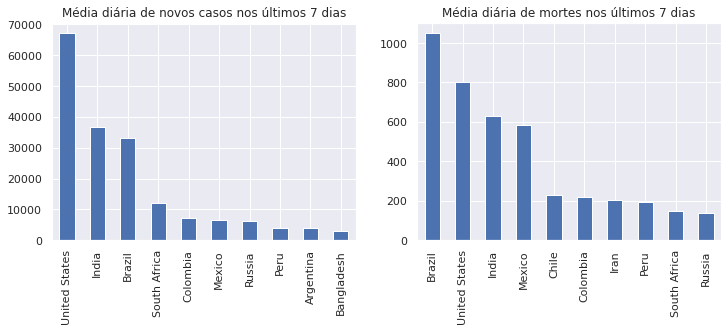

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
 
top10_newcases.plot(ax=ax[0], kind="bar", title="Média diária de novos casos nos últimos 7 dias")
ax[0].set_xlabel("")
 
top10_newdeaths.plot(ax=ax[1], kind="bar", title="Média diária de mortes nos últimos 7 dias")
ax[1].set_xlabel("")
 
plt.show()
fig.tight_layout()

De fato, países com uma grande população têm um maior potencial de ter mais novos casos e mais mortes. Porém, esses valores são absolutos e podem trazer um viés para a análise. Para isso, faremos a mesma análise com números **relativos** a 1 milhão de habitantes.

In [28]:
top10_newcases_pm = (df.loc[(df.date >= today_7_str) & (df.date <= yesterday_str)].groupby(df.location).new_cases_per_million.sum().sort_values(ascending=False)/7)[:10]
top10_newdeaths_pm = (df.loc[(df.date >= today_7_str) & (df.date <= yesterday_str)].groupby(df.location).new_deaths_per_million.sum().sort_values(ascending=False)/7)[:10]

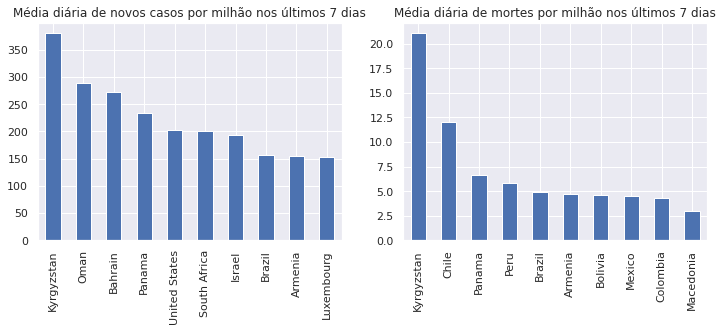

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

top10_newcases_pm.plot(ax=ax[0], kind="bar", title="Média diária de novos casos por milhão nos últimos 7 dias")
ax[0].set_xlabel("")

top10_newdeaths_pm.plot(ax=ax[1], kind="bar", title="Média diária de mortes por milhão nos últimos 7 dias")
ax[1].set_xlabel("")

plt.show()
fig.tight_layout()

A conclusão que podemos tirar dos gráficos com os números **relativos** é que no dia da última atualização dos dados, países com população relativamente baixa possuem um maior número de casos em relação a sua população, como era de se esperar. Isso pode ilustrar a criticidade de alguns países no Oriente Médio comparado com países da Europa Ocidental, por exemplo, que possuem números absolutos muito superiores. Porém, alguns países como Brasil e EUA continuam aparecendo no topo da lista. 

Ao se tratar do número de mortes por cada 1 milhão de habitantes, os números deixam claro que os países da América Latina têm uma maior criticidade. Isso pode estar ligado com o desenvolvimento desses países. Para tirar essa conclusão, será feita uma análise mais profunda com informações relativas essa característica. 

###Letalidade do vírus do mundo

Os números vêm crescendo diariamente, mas podemos perceber que embora o crescimento dos casos seja cada vez maior, existe uma leve queda no crescimento de mortes. Isso pode acontecer por conta de uma possível queda na letalidade do vírus.

Para calcular a taxa de mortalidade do COVID-19, simplesmente dividimos o número de mortes pelo número de casos. Esse número é "grosseiro" pois não leva em consideração o tempo em dias entre pegar a doença e o óbito, nem o nível de desenvolvimento dos países, número de leitos disponíveis, etc, mas é uma forma de visualizarmos o crescimento da letalidade. 

Pelo gráfico abaixo, é possível ver que a taxa de mortalidade no mundo foi subindo até meads de abril, período que a letalidade atingiu seu pico, ultrapassando a marca de 10%. Depois disso, o número foi caindo constantemente. 

Houve 2 picos na taxa de mortalidade: dia 20 e 24 de Fevereiro e foram por causa de uma queda mais brusca no número de novos casos, número que era muito puxado pela China, até então o país com maior número de casos e mortes pelo COVID-19.

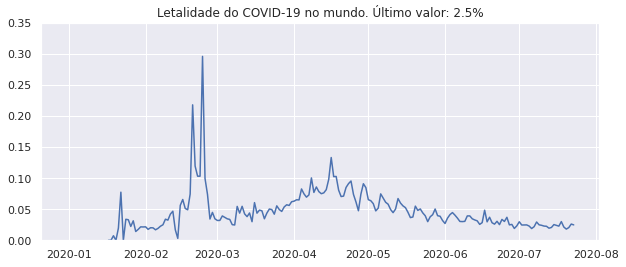

In [30]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot((df.new_deaths.groupby(df.date).sum() / df.new_cases.groupby(df.date).sum()))
ax.set_title("Letalidade do COVID-19 no mundo. Último valor: "+format((df.new_deaths.groupby(df.date).sum() / df.new_cases.groupby(df.date).sum())[-1],".1%"))
ax.set_ylim(0,0.35)

fig.tight_layout
plt.show()

##Verificando correlações entre as variáveis

O gráfico abaixo ilustra a relação entre cada uma das variáveis, sendo que quanto mais próximas de 1, mais forte é a correlação positiva e quando mais próxima de -1, mais forte é a correlação negativa. Consequentemente, quanto mais próxima de 0, mais fraca é a correlação, seja ela positiva ou negativa.

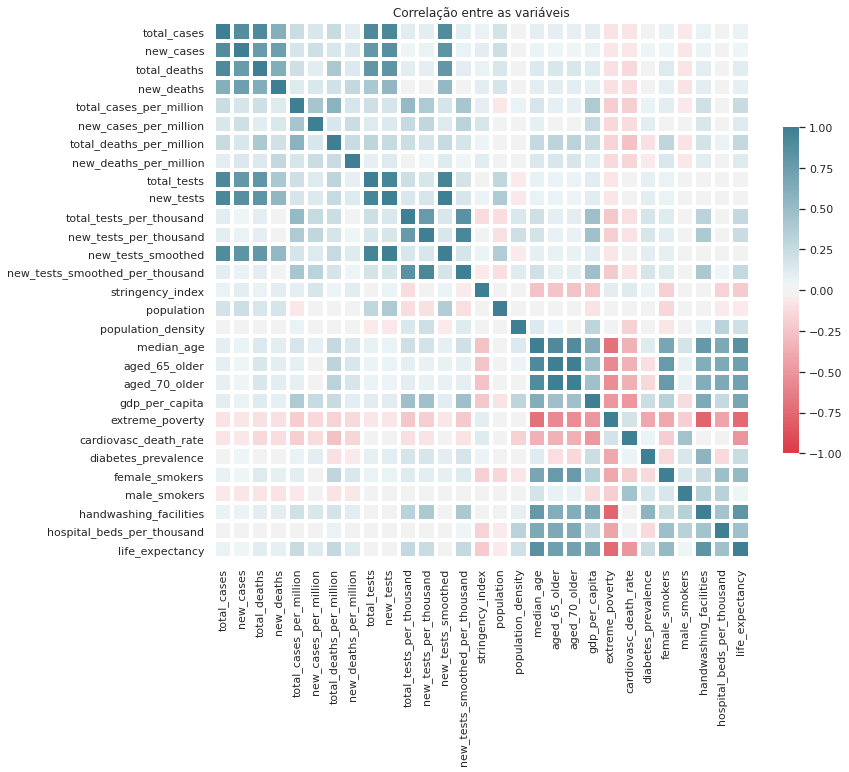

In [31]:
correlacao = df.corr()
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
mask = np.triu(np.ones_like(correlacao, dtype=np.bool))
ax.set_title("Correlação entre as variáveis")

sns.heatmap(correlacao, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=3, cbar_kws={"shrink": .5})

fig.tight_layout
plt.show()

Com base no *Heatmap* acima, podemos tirar alguns insights

* Não há uma forte relação entre o número total de casos com a densidade da população, pensando em uma possível "aglomeração" maior nos países mais povoados
* Por mais fraca que seja a relação entre o grau de restrição e o número de novos casos por milhão, essa relação é positiva. Ou seja, países que adotaram uma maior restrição da população não garantiu que o número de novos casos por milhão aumentasse
* Estranhamente, não há uma relação positiva entre o número de doenças cardio vasculares e o número de mortes por milhão. Ou seja, quanto maior for a proporção de portadores desses problemas de saúde, menor a taxa de mortes por milhão (na média)
* Já com relação a diabetes, esse número se inverte, embora a relação não seja forte
* Quanto maior o PIB per capita do país, maior o número de testes realizados e, consequentemente, maior o número de casos
* O desenvolvimento dos países (levando em consideração PIB per capita e nível de pobreza), aparentemente, não possui relação positiva comparado ao número de mortes por milhão, ponto que havia sido levantado nos países da América Latina


#Números no Brasil
Da mesma maneira que analisamos os números do mundo, iremos visualizar como está o cenário no nosso país.

Atingimos o pico do número de casos no país no início de Julho e esse número vem caindo lentamente ao longo dos dias. 

O número de mortes, por outro lado, se mantem no mesmo patamar há aproximadamente 2 meses, com 1 mil mortes por dia. 

In [32]:
df_new_cases_br = pd.DataFrame(df[df.location=="Brazil"].new_cases.groupby(df.date).sum())
df_new_cases_br.insert(1, "ma_new_cases", 0)
for i in range(0, df_new_cases_br.shape[0]-6):
  df_new_cases_br.iloc[i+6, 1] = (df_new_cases_br.iloc[i, 0]+df_new_cases_br.iloc[i+1, 0]+df_new_cases_br.iloc[i+2, 0]+df_new_cases_br.iloc[i+3, 0]+df_new_cases_br.iloc[i+4, 0]+df_new_cases_br.iloc[i+5, 0]+df_new_cases_br.iloc[i+6, 0])/7

In [33]:
df_new_deaths_br = pd.DataFrame(df[df.location=="Brazil"].new_deaths.groupby(df.date).sum())
df_new_deaths_br.insert(1, "ma_new_deaths", 0)
for i in range(0, df_new_deaths_br.shape[0]-6):
  df_new_deaths_br.iloc[i+6, 1] = (df_new_deaths_br.iloc[i, 0]+df_new_deaths_br.iloc[i+1, 0]+df_new_deaths_br.iloc[i+2, 0]+df_new_deaths_br.iloc[i+3, 0]+df_new_deaths_br.iloc[i+4, 0]+df_new_deaths_br.iloc[i+5, 0]+df_new_deaths_br.iloc[i+6, 0])/7

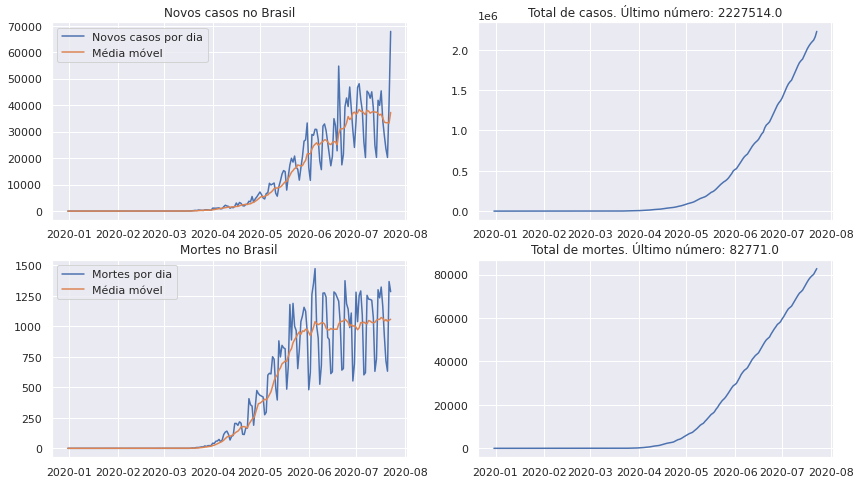

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

ax[0,0].plot(df_new_cases_br.new_cases)
ax[0,0].plot(df_new_cases_br.ma_new_cases)
ax[0,0].legend(["Novos casos por dia", "Média móvel"])
ax[0,0].set_title("Novos casos no Brasil")

ax[0,1].plot(df[df.location=="Brazil"].total_cases.groupby(df.date).sum())
ax[0,1].set_title("Total de casos. Último número: "+str(df.total_cases[df.location=="Brazil"][df.total_cases[df.location=="Brazil"].index.max()]))

ax[1,0].plot(df_new_deaths_br.new_deaths)
ax[1,0].plot(df_new_deaths_br.ma_new_deaths)
ax[1,0].legend(["Mortes por dia", "Média móvel"])
ax[1,0].set_title("Mortes no Brasil")

ax[1,1].plot(df[df.location=="Brazil"].total_deaths.groupby(df.date).sum())
ax[1,1].set_title("Total de mortes. Último número: "+str(df.total_deaths[df.location=="Brazil"][df.total_deaths[df.location=="Brazil"].index.max()]))

fig.tight_layout
plt.show()

##Índice de restrição

O índice de restrição no Brasil teve o seu último número divulgado em 15 de Julho com o valor de 81 (sendo 100, totalmente restrito), se mantendo como número historicamente alto. 

A restrição no Brasil começou a tona na primeira quinzena de Março, período em que foi decretada a pandemia no país. Embora o índice de restrição já estivesse alto, o número de casos no Brasil ainda não havia crescido, fato que só foi acontcer depois 1 mês. 

É claro que, os números de casos oficiais são inferiores aos números reais, ou seja, esse número de casos já eram muito maiores quando olhamos para meados de Abril no gráfico abaixo. 

Porém, o fato do índice de restrição estar em um alto patamar, não houve reflexo no aumento do número de novos casos. Aparentemente, esse número ia crescer, inevitavelmente.

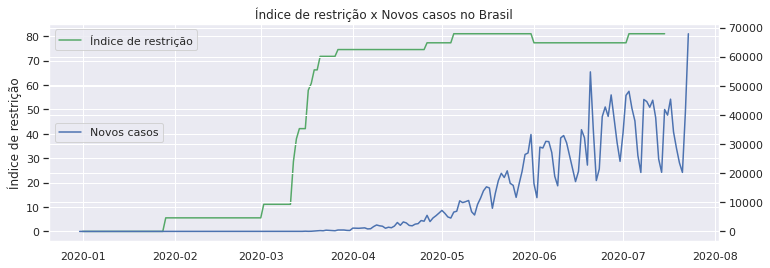

In [35]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax2=ax1.twinx()

ax1.plot(df[df.location=="Brazil"].stringency_index.groupby(df.date).mean(), "g-")
ax2.plot(df[df.location=="Brazil"].new_cases.groupby(df.date).sum())
ax1.legend(["Índice de restrição"], loc="best")
ax2.legend(["Novos casos"], loc="center left")
ax1.set_title("Índice de restrição x Novos casos no Brasil")
ax1.set_ylabel("Índice de restrição")

plt.show()

##Letalidade do vírus

Da mesma maneira que o número foi calculado para o mundo, vamos olhar para a curva da mortalidade causada pelo COVID-19 somente no Brasil.

A curva se assemelha muito a curva referente ao mundo, mas com os números ligeiramente menores mas notamos que no último mês esse número teve um leve aumento, ficando acima da média mundial. 

Conforme visto anteriormente, o número de novos casos tem caído, mas o número de mortes tem se mantido. Isso justifica o fato desse leve aumento na taxa de mortalidade. 

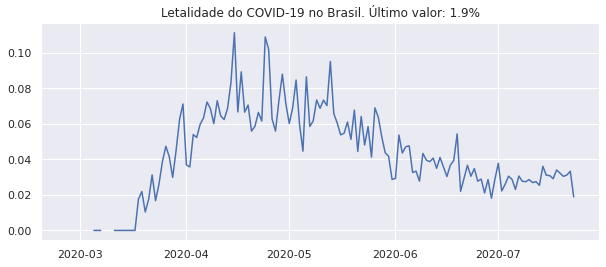

In [36]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot((df.loc[df.location=="Brazil"].new_deaths.groupby(df.date).sum() / df.loc[df.location=="Brazil"].new_cases.groupby(df.date).sum()))
ax.set_title("Letalidade do COVID-19 no Brasil. Último valor: "+format((df[df.location=="Brazil"].new_deaths.groupby(df.date).sum() / df[df.location=="Brazil"].new_cases.groupby(df.date).sum())[-1],".1%"))

fig.tight_layout
plt.show()

#Números nos Estados Unidos

Os Estados Unidos é um dos países que claramente passa por uma segunda onda de contágio do COVID-19. Número esse justificado pelo Donald Trump por conta do alto número de testes realizados (o que faz todo sentido de acordo com a análise de correlação). 

Apesar do número de novos casos só subir, o número de mortes cai consideravelmente. Isso reflete diretamente na análise da mortalidade do vírus, visto em seguida. 

In [37]:
df_new_cases_us = pd.DataFrame(df[df.location=="United States"].new_cases.groupby(df.date).sum())
df_new_cases_us.insert(1, "ma_new_cases", 0)
for i in range(0, df_new_cases_us.shape[0]-6):
  df_new_cases_us.iloc[i+6, 1] = (df_new_cases_us.iloc[i, 0]+df_new_cases_us.iloc[i+1, 0]+df_new_cases_us.iloc[i+2, 0]+df_new_cases_us.iloc[i+3, 0]+df_new_cases_us.iloc[i+4, 0]+df_new_cases_us.iloc[i+5, 0]+df_new_cases_us.iloc[i+6, 0])/7

In [38]:
df_new_deaths_us = pd.DataFrame(df[df.location=="United States"].new_deaths.groupby(df.date).sum())
df_new_deaths_us.insert(1, "ma_new_deaths", 0)
for i in range(0, df_new_deaths_us.shape[0]-6):
  df_new_deaths_us.iloc[i+6, 1] = (df_new_deaths_us.iloc[i, 0]+df_new_deaths_us.iloc[i+1, 0]+df_new_deaths_us.iloc[i+2, 0]+df_new_deaths_us.iloc[i+3, 0]+df_new_deaths_us.iloc[i+4, 0]+df_new_deaths_us.iloc[i+5, 0]+df_new_deaths_us.iloc[i+6, 0])/7

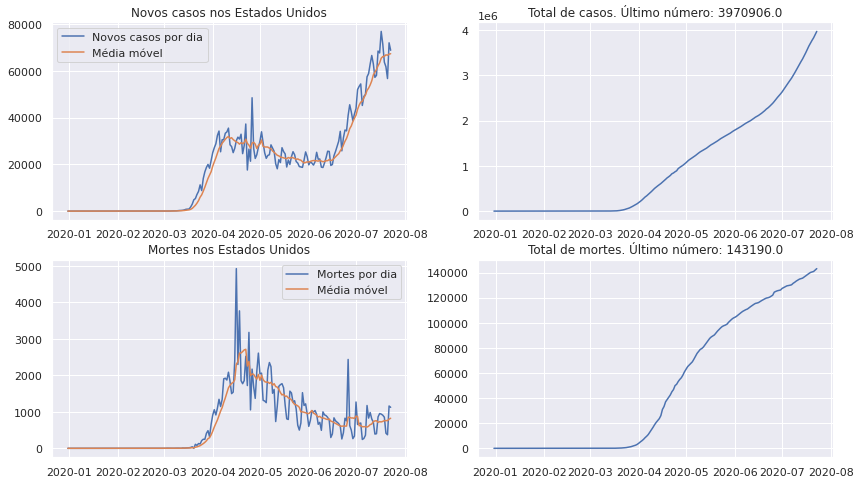

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

ax[0,0].plot(df_new_cases_us.new_cases)
ax[0,0].plot(df_new_cases_us.ma_new_cases)
ax[0,0].legend(["Novos casos por dia", "Média móvel"])
ax[0,0].set_title("Novos casos nos Estados Unidos")

ax[0,1].plot(df[df.location=="United States"].total_cases.groupby(df.date).sum())
ax[0,1].set_title("Total de casos. Último número: "+str(df.total_cases[df.location=="United States"][df.total_cases[df.location=="United States"].index.max()]))

ax[1,0].plot(df_new_deaths_us.new_deaths)
ax[1,0].plot(df_new_deaths_us.ma_new_deaths)
ax[1,0].legend(["Mortes por dia", "Média móvel"])
ax[1,0].set_title("Mortes nos Estados Unidos")

ax[1,1].plot(df[df.location=="United States"].total_deaths.groupby(df.date).sum())
ax[1,1].set_title("Total de mortes. Último número: "+str(df.total_deaths[df.location=="United States"][df.total_deaths[df.location=="United States"].index.max()]))

fig.tight_layout
plt.show()

##Índice de restrição

Antes de atingir o pico na primeira onda, a restrição já havia atingido o patamar máximo histórico e permaneceu até meados de Junho. 

No dia 15 de Junho, o índice de restrição caiu levemente (de 73 para 69), mesma época em que o número de casos voltou a subir e levou para a segunda onda do COVID-19 nos Estados Unidos. 

Entretanto, não foi exatamente o índice de restrição que levou o aumento no número dos casos nos Estados Unidos. Esse número iria aumentar de qualquer maneira, pois a segunda onda está ligado a estados populosos que não tinha sido tão afetados na primeira, como California, Texas e Flórida.


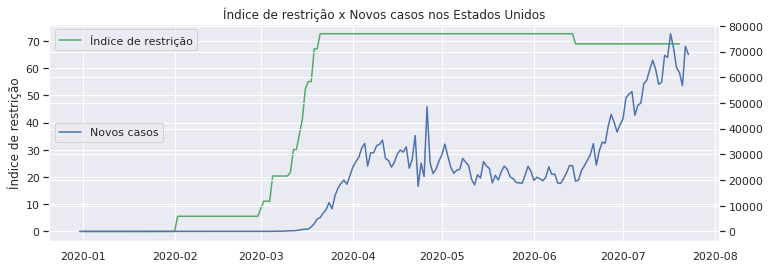

In [40]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax2=ax1.twinx()

ax1.plot(df[df.location=="United States"].stringency_index.groupby(df.date).mean(), "g-")
ax2.plot(df[df.location=="United States"].new_cases.groupby(df.date).sum())
ax1.legend(["Índice de restrição"], loc="best")
ax2.legend(["Novos casos"], loc="center left")
ax1.set_title("Índice de restrição x Novos casos nos Estados Unidos")
ax1.set_ylabel("Índice de restrição")

plt.show()

In [41]:
df[df.location=="United States"].stringency_index.groupby(df.date).sum()[130:180]

date
2020-05-09    72.69
2020-05-10    72.69
2020-05-11    72.69
2020-05-12    72.69
2020-05-13    72.69
2020-05-14    72.69
2020-05-15    72.69
2020-05-16    72.69
2020-05-17    72.69
2020-05-18    72.69
2020-05-19    72.69
2020-05-20    72.69
2020-05-21    72.69
2020-05-22    72.69
2020-05-23    72.69
2020-05-24    72.69
2020-05-25    72.69
2020-05-26    72.69
2020-05-27    72.69
2020-05-28    72.69
2020-05-29    72.69
2020-05-30    72.69
2020-05-31    72.69
2020-06-01    72.69
2020-06-02    72.69
2020-06-03    72.69
2020-06-04    72.69
2020-06-05    72.69
2020-06-06    72.69
2020-06-07    72.69
2020-06-08    72.69
2020-06-09    72.69
2020-06-10    72.69
2020-06-11    72.69
2020-06-12    72.69
2020-06-13    72.69
2020-06-14    72.69
2020-06-15    68.98
2020-06-16    68.98
2020-06-17    68.98
2020-06-18    68.98
2020-06-19    68.98
2020-06-20    68.98
2020-06-21    68.98
2020-06-22    68.98
2020-06-23    68.98
2020-06-24    68.98
2020-06-25    68.98
2020-06-26    68.98
2020-06-27    6

##Letalidade do vírus

Como vimos anteriormente, enquando os números de novos casos sobem nos Estados Unidos, o número de novas mortes cai. O gráfico abaixo, ilustra como a taxa de mortalidade tem se comportado ao longo do tempo.

Da mesma forma que no mundo houve datas com a taxa de mortalidade muito acima da tendência, nos EUA não foi diferente. No início, quando o número de mortes e casos ainda eram baixos, qualquer alteração pequena poderia causar um impacto grande na taxa de mortalidade. Foi o que aconteceu no dia 01 de Março (1 morte para 3 casos novos) e no dia 03 de Março (4 mortes para 14 casos novos), o que justifica os outliers no início. 

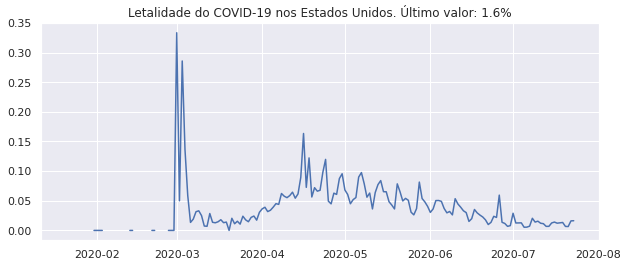

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot((df.loc[df.location=="United States"].new_deaths.groupby(df.date).sum() / df.loc[df.location=="United States"].new_cases.groupby(df.date).sum()))
ax.set_title("Letalidade do COVID-19 nos Estados Unidos. Último valor: "+format((df[df.location=="United States"].new_deaths.groupby(df.date).sum() / df[df.location=="United States"].new_cases.groupby(df.date).sum())[-1],".1%"))

fig.tight_layout
plt.show()

#Números na Europa

A Europa foi o primeiro continente que de fato a situação foi alarmante (desconsiderando a China, por não apresentar mais casos de COVID-19 depois do seu pico). Países altamente populosos da Europa Ocidental como Itália, Reino Unido, Alemanha, França e Espanha, viram os números de novos casos subirem muito rapidamente no início, mas estão hoje em uma situação relativamente mais "controlável" pois o número de novos casos já é baixíssimo. O mesmo caso acontece com a Rússia hoje, porém os números estão caindo menos rapidamente.

Com o mesmo comportamente, o número de mortes também vem caindo bastante. 

Veremos a seguir.

In [43]:
df_new_cases_eur = pd.DataFrame(df[df.continent=="Europe"].new_cases.groupby(df.date).sum())
df_new_cases_eur.insert(1, "ma_new_cases", 0)
for i in range(0, df_new_cases_eur.shape[0]-6):
  df_new_cases_eur.iloc[i+6, 1] = (df_new_cases_eur.iloc[i, 0]+df_new_cases_eur.iloc[i+1, 0]+df_new_cases_eur.iloc[i+2, 0]+df_new_cases_eur.iloc[i+3, 0]+df_new_cases_eur.iloc[i+4, 0]+df_new_cases_eur.iloc[i+5, 0]+df_new_cases_eur.iloc[i+6, 0])/7

In [44]:
df_new_deaths_eur = pd.DataFrame(df[df.continent=="Europe"].new_deaths.groupby(df.date).sum())
df_new_deaths_eur.insert(1, "ma_new_deaths", 0)
for i in range(0, df_new_deaths_eur.shape[0]-6):
  df_new_deaths_eur.iloc[i+6, 1] = (df_new_deaths_eur.iloc[i, 0]+df_new_deaths_eur.iloc[i+1, 0]+df_new_deaths_eur.iloc[i+2, 0]+df_new_deaths_eur.iloc[i+3, 0]+df_new_deaths_eur.iloc[i+4, 0]+df_new_deaths_eur.iloc[i+5, 0]+df_new_deaths_eur.iloc[i+6, 0])/7

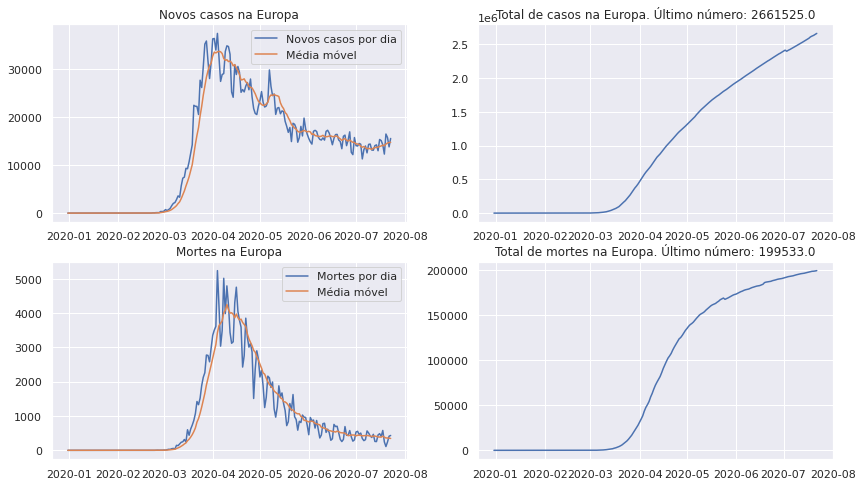

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

ax[0,0].plot(df_new_cases_eur.new_cases)
ax[0,0].plot(df_new_cases_eur.ma_new_cases)
ax[0,0].legend(["Novos casos por dia", "Média móvel"])
ax[0,0].set_title("Novos casos na Europa")

ax[0,1].plot(df.total_cases[df.continent=="Europe"].groupby(df.date).sum()[0:df.total_cases[df.continent=="Europe"].groupby(df.date).sum().shape[0]-1])
ax[0,1].set_title("Total de casos na Europa. Último número: "+str(df.total_cases[df.continent=="Europe"].groupby(df.date).sum()[-2]))

ax[1,0].plot(df_new_deaths_eur.new_deaths)
ax[1,0].plot(df_new_deaths_eur.ma_new_deaths)
ax[1,0].legend(["Mortes por dia", "Média móvel"])
ax[1,0].set_title("Mortes na Europa")

ax[1,1].plot(df.total_deaths[df.continent=="Europe"].groupby(df.date).sum()[0:df.total_deaths[df.continent=="Europe"].groupby(df.date).sum().shape[0]-1])
ax[1,1].set_title("Total de mortes na Europa. Último número: "+str(df.total_deaths[df.continent=="Europe"].groupby(df.date).sum()[-2]))

fig.tight_layout
plt.show()

##Número de alguns países

Tomaremos como referência alguns países que tiveram alto número de casos e mortes, mas que hoje apresentam uma situação mais controlada. 

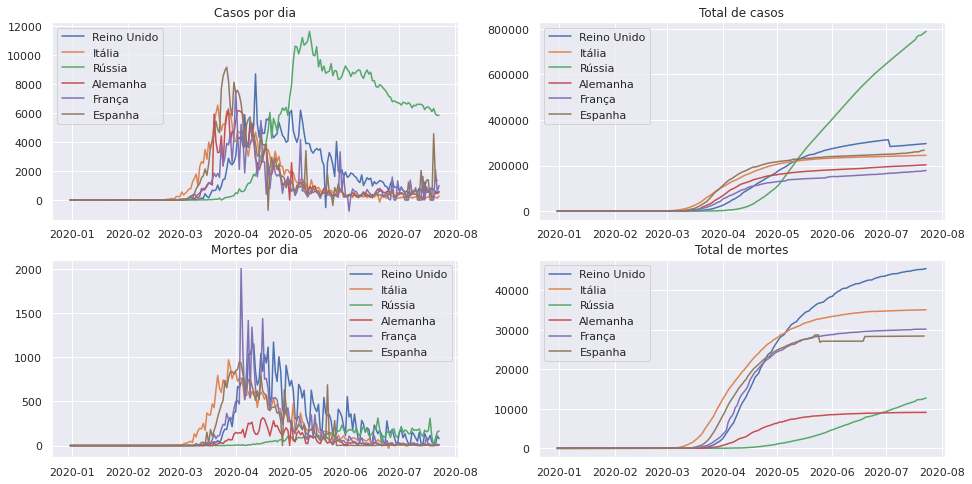

In [46]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 8))

ax[0,0].plot(df[df.location=="United Kingdom"].new_cases.groupby(df.date).sum())
ax[0,0].plot(df[df.location=="Italy"].new_cases.groupby(df.date).sum())
ax[0,0].plot(df[df.location=="Russia"].new_cases.groupby(df.date).sum())
ax[0,0].plot(df[df.location=="Germany"].new_cases.groupby(df.date).sum())
ax[0,0].plot(df[df.location=="France"].new_cases.groupby(df.date).sum())
ax[0,0].plot(df[df.location=="Spain"].new_cases.groupby(df.date).sum())
ax[0,0].legend(["Reino Unido", "Itália", "Rússia", "Alemanha", "França", "Espanha"])
ax[0,0].set_title("Casos por dia")

ax[0,1].plot(df[df.location=="United Kingdom"].total_cases.groupby(df.date).sum())
ax[0,1].plot(df[df.location=="Italy"].total_cases.groupby(df.date).sum())
ax[0,1].plot(df[df.location=="Russia"].total_cases.groupby(df.date).sum())
ax[0,1].plot(df[df.location=="Germany"].total_cases.groupby(df.date).sum())
ax[0,1].plot(df[df.location=="France"].total_cases.groupby(df.date).sum())
ax[0,1].plot(df[df.location=="Spain"].total_cases.groupby(df.date).sum())
ax[0,1].legend(["Reino Unido", "Itália", "Rússia", "Alemanha", "França", "Espanha"])
ax[0,1].set_title("Total de casos")

ax[1,0].plot(df[df.location=="United Kingdom"].new_deaths.groupby(df.date).sum())
ax[1,0].plot(df[df.location=="Italy"].new_deaths.groupby(df.date).sum())
ax[1,0].plot(df[df.location=="Russia"].new_deaths.groupby(df.date).sum())
ax[1,0].plot(df[df.location=="Germany"].new_deaths.groupby(df.date).sum())
ax[1,0].plot(df[df.location=="France"].new_deaths.groupby(df.date).sum())
ax[1,0].plot(df[df.location=="Spain"].new_deaths.groupby(df.date).sum())
ax[1,0].legend(["Reino Unido", "Itália", "Rússia", "Alemanha", "França", "Espanha"])
ax[1,0].set_title("Mortes por dia")

ax[1,1].plot(df[df.location=="United Kingdom"].total_deaths.groupby(df.date).sum())
ax[1,1].plot(df[df.location=="Italy"].total_deaths.groupby(df.date).sum())
ax[1,1].plot(df[df.location=="Russia"].total_deaths.groupby(df.date).sum())
ax[1,1].plot(df[df.location=="Germany"].total_deaths.groupby(df.date).sum())
ax[1,1].plot(df[df.location=="France"].total_deaths.groupby(df.date).sum())
ax[1,1].plot(df[df.location=="Spain"].total_deaths.groupby(df.date).sum())
ax[1,1].legend(["Reino Unido", "Itália", "Rússia", "Alemanha", "França", "Espanha"])
ax[1,1].set_title("Total de mortes")


fig.tight_layout
plt.show()


##Índice de restrição

Tomaremos como referência alguns países da Europa para analisar o quanto a restrição afetou nos números de novos casos. 

No caso da Itália, primeiro país a ser efetivamente afetado na Europa pelo COVID-19, chegou ao pico da restrição na segunda quinzena de Março, se manteve por mais 1 mês e meio, aproximadamente, e como o número de casos já começaram a cair, o índice foi caindo até o patamar de 60. 

No Reino Unido, o índice permance relativamente alto, em comparação ao histórico do país. 

Na Alemanha, a situação é parecida com a da Itália, porém já mostra avanços de uma situação bastante controlada. 

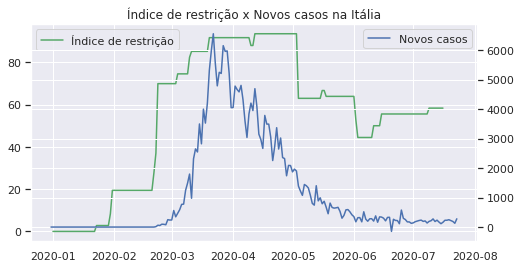

In [47]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax2=ax1.twinx()

ax1.plot(df[df.location=="Italy"].stringency_index.groupby(df.date).mean(), "g-")
ax2.plot(df[df.location=="Italy"].new_cases.groupby(df.date).sum())
ax1.legend(["Índice de restrição"], loc="upper left")
ax2.legend(["Novos casos"], loc="upper right")
ax1.set_title("Índice de restrição x Novos casos na Itália")

fig.tight_layout
plt.show()

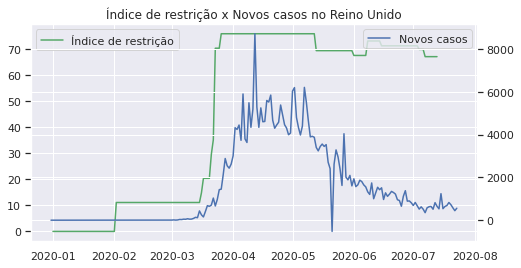

In [48]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax2=ax1.twinx()

ax1.plot(df[df.location=="United Kingdom"].stringency_index.groupby(df.date).mean(), "g-")
ax2.plot(df[df.location=="United Kingdom"].new_cases.groupby(df.date).sum())
ax1.legend(["Índice de restrição"], loc="upper left")
ax2.legend(["Novos casos"], loc="upper right")
ax1.set_title("Índice de restrição x Novos casos no Reino Unido")

fig.tight_layout
plt.show()

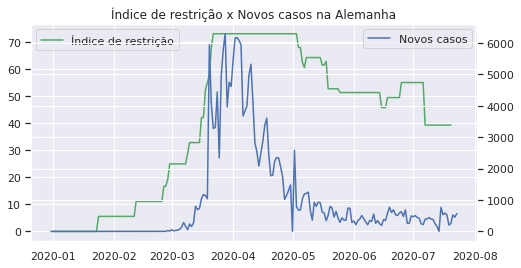

In [49]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax2=ax1.twinx()

ax1.plot(df[df.location=="Germany"].stringency_index.groupby(df.date).mean(), "g-")
ax2.plot(df[df.location=="Germany"].new_cases.groupby(df.date).sum())
ax1.legend(["Índice de restrição"], loc="upper left")
ax2.legend(["Novos casos"], loc="upper right")
ax1.set_title("Índice de restrição x Novos casos na Alemanha")

fig.tight_layout
plt.show()

##Letalidade do vírus

Podemos dizer que das regiões analisadas, a Europa foi a que mais sofreu com o COVID-19 em termos de taxa de mortalidade. Lá, o número chegou a ultrapassar a marca de 17% em seu pico, mas esse número vem caindo bastante e hoje está abaixo de 2%.

O alto número se deu muito pelo fato de ser um continente com a proporção de pessoas acima de 65 anos mais alta que a média mundial. 

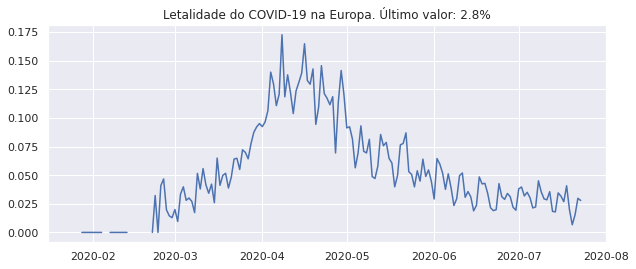

In [50]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot((df.loc[df.continent=="Europe"].new_deaths.groupby(df.date).sum() / df.loc[df.continent=="Europe"].new_cases.groupby(df.date).sum()))
ax.set_title("Letalidade do COVID-19 na Europa. Último valor: "+format((df[df.continent=="Europe"].new_deaths.groupby(df.date).sum() / df[df.continent=="Europe"].new_cases.groupby(df.date).sum())[-1],".1%"))

fig.tight_layout
plt.show()

#Conclusão

Podemos tirar algumas conclusões a partir dessa análise. 

Quanto ao número de casos, observamos que todas as regiões apresentam um pico e depois caem até próximo de zero. Para todos as regiões foram assim. Mas e para os Estados Unidos? Se olharmos para o país como um todo, realmente não é bem assim que acontece. Mas se tivermos uma visão a nível de estados, podemos notar que o comportamento é normalmente de queda constante depois do pico. 

**Para termos uma ideia do número de casos, quebrando pelos estados dos países, podemos verificar neste [link](https://news.google.com/covid19/map?hl=pt-BR&gl=BR&ceid=BR%3Apt-419&mid=%2Fm%2F09c7w0).**

O número de mortes em nível global vem subindo aos poucos e isso se justifica pelo aumento do número de casos no mundo. Porém em uma proporção menor, o que reforça a queda na taxa de mortalidade do vírus. Dos países analisados, o Brasil é o único que possui uma taxa de mortalidade acima da média mundial, embora também esteja caindo. Isso não foi comprovado na análise. Talvez devido a uma cultura de não obter dados no Brasil, os números que disponibilizamos aqui não sejam tão fiéis? Vale uma análise muito mais profundo em outro estudo. 

O índice de restição aparentemente não afetou nenhum comportamento de novos casos nas regiões observadas e aqueles países que já atingiram seu pico e já apresentaram queda no número de casos (como os países da Europa Ocidental) apresentam índices de restrição muito menores. 